In [1]:
# Mostly a dummy test idea

# Functionalize network making algorithm
# Import Packages
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Functions that make network.
def makeProbMatrix(prob_list):
    if len(prob_list) == 2: 
        A = prob_list[0]
        B = prob_list[1]
        return [[A, B],[B, A]]
    else:
        A = prob_list[0]
        B = prob_list[1]
        C = prob_list[2]
        D = prob_list[3]
        return [[A, B, C, D],[B, A, D, C],[C, D, A, B],[D, C, B, A]]

def initializeNetwork(node_numbers, node_type):
    g = ig.Graph(directed = False)
    for k in range(len(node_numbers)):
        g.add_vertices(n = node_numbers[k])
        if k == 0:
            for m in range(0, node_numbers[k]):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2']  = node_attribute2[k]
        else:
            for m in range(sum(node_numbers[:k]), sum(node_numbers[:k+1])):
                g.vs[m]['type'] = node_type[k]
                #g.vs[m]['attr1'] = node_attribute1[k]
                #g.vs[m]['attr2'] = node_attribute2[k]
    return g

def addConnections(network, prob_matrix):
    for node in range(len(network.vs)):
        for other_node in range(node+1,total_Nodes):
            if (np.random.uniform()) < prob_matrix[network.vs[node]['type']][network.vs[other_node]['type']]:
                network.add_edge(node,other_node)
    return network

def MakeNetwork(node_numbers, node_type, prob_matrix):
    network = initializeNetwork(node_numbers, node_type)
    network = addConnections(network, prob_matrix)
    return network

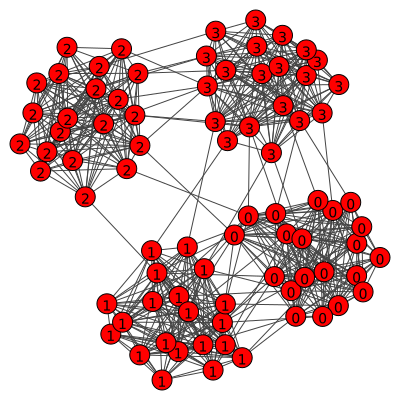

In [46]:
# Define n and P
# Each node is given a type which is based on the combination of attrbutes

node_numbers    = [20, 20,20,20] # Slows down a bit when total nodes > 400
total_Nodes     = sum(node_numbers)
node_type       = [0, 1,2,3]
node_attribute1 = [1, 1, 2, 2]
node_attribute2 = [1, 2, 1, 2]

prob_matrix =  makeProbMatrix([0.8, 0.05, 0.01, 0.01])

# Uncomment to check

#network = initializeNetwork(node_numbers, node_type)
#network = addConnections(network, prob_matrix)
network = MakeNetwork (node_numbers, node_type, prob_matrix)
ig.plot(network , bbox=(0,0,400,400), vertex_label=network.vs['type'])

In [50]:
# Lets build a loop that will scan over the parameter space according to our basic priors
N = 100 # 2 node
graphs       = [0]*N
pmatrix_list = [0]*N
measure      = [0]*N

# Two Node
counter = 0
for k in range(1,10):
    for n in range (1,k):
        graphs[counter]       = MakeNetwork([20, 20], [0,1],
                                            makeProbMatrix([k/20,n/20]))
        pmatrix_list[counter] = [k/10,n/10]
        measure[counter]      = graphs[counter].assortativity('type')
        counter = counter + 1

IndexError: vertex index out of range

In [53]:
# 4 Node
N =  330# 4 node
graphs       = [0]*N
pmatrix_list = [0]*N
measure      = [0]*N

counter = 0
for k in range(1,10):
    for n in range (1,k):
        for m in range(n,k):
            for q in range(m,k):
                graphs[counter]       = MakeNetwork([20, 20, 20, 20], [0,1,2,3],
                                                makeProbMatrix([k/20,n/20,m/20,q/20]))
                pmatrix_list[counter] = [k/10,n/10,m/10,q/10]
                measure[counter]      = graphs[counter].assortativity('type')
                counter = counter + 1
print counter

330


In [54]:
# Make a plot
x = [0]*counter
y = [0]*counter

for k in range(counter):
    x[k] = pmatrix_list[k][0]
    y[k] = pmatrix_list[k][1]
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
ax.scatter(x, y, measure, c='r', marker='o')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Assortativity')

plt.show()

In [55]:
# The probability matrix that maximizes the degree Assortativity
print pmatrix_list[measure.index(max(measure))]
print max(measure)

[0.8, 0.1, 0.1, 0.1]
0.657621954069


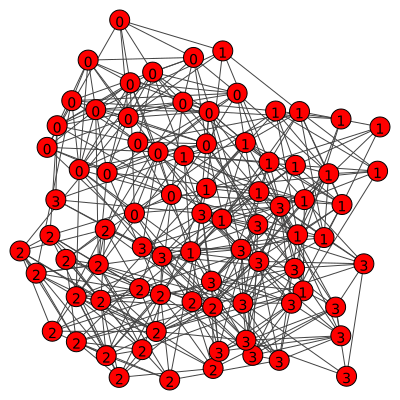

In [56]:
ig.plot(graphs[measure.index(max(measure))] , bbox=(0,0,400,400), vertex_label=network.vs['type'])

36
